

---


<div style="border: 2px solid #4CAF50; padding: 15px; border-radius: 10px; background-color: #f9f9f9;">
    <h2 style="color: #333;">Title: Project on Fashion MNIST Classification using CNN</h2>
    <p><strong>Name:</strong> Maharaj Hossain Tanim</p>
    <p><strong>ID:</strong> 2215151040</p>
    <p><strong>Batch:</strong> 51; <strong>Section:</strong> A</p>
    <p><strong>Course:</strong> Machine Learning Lab</p>
    <p><strong>Course Code:</strong> CSE 432</p>
</div>


---



In [20]:
#importing necessary files.

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#step-1. Load the Fashion MNIST Dataset
print("Loading Fashion MNIST dataset...")
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
print("Dataset loaded successfully!")

# Define class names for visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Loading Fashion MNIST dataset...
Dataset loaded successfully!


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


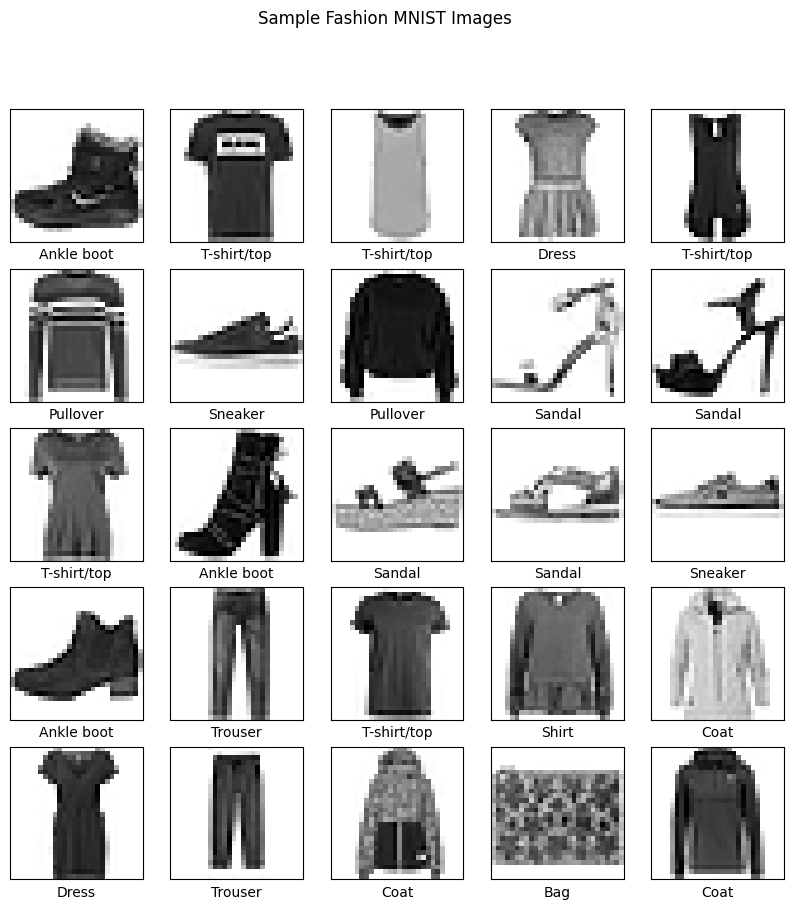

In [22]:
#step-2. Explore the Data (Optional, but good for reporting)
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

# Plot a few training images to visualize
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.suptitle("Sample Fashion MNIST Images")
plt.show()


In [23]:
#step-3. Preprocess the Images
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to include a channel dimension (28, 28, 1) for CNN input
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print(f"Reshaped train images shape: {train_images.shape}")
print(f"Reshaped test images shape: {test_images.shape}")


Reshaped train images shape: (60000, 28, 28, 1)
Reshaped test images shape: (10000, 28, 28, 1)


In [24]:
#step-4. Build the CNN Model
print("\nBuilding the CNN model...")
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 classes for Fashion MNIST
])

# Display model summary
model.summary()


Building the CNN model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
#step-5. Compile the Model
print("\nCompiling the model...")
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print("Model compiled successfully!")



Compiling the model...
Model compiled successfully!


In [26]:
#step-6. Train the Model
print("\nTraining the model...")
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
print("Model training complete!")



Training the model...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7355 - loss: 0.7187

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7357 - loss: 0.7183 - val_accuracy: 0.8658 - val_loss: 0.3837
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8749 - loss: 0.3465 - val_accuracy: 0.8831 - val_loss: 0.3289
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8943 - loss: 0.2858 - val_accuracy: 0.8935 - val_loss: 0.2920
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9066 - loss: 0.2533 - val_accuracy: 0.8971 - val_loss: 0.2919
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9169 - loss: 0.2244 - val_accuracy: 0.9039 - val_loss: 0.2732
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9230 - loss: 0.2064 - val_accuracy: 0.9086 - val_loss: 0.2593
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9295 - loss: 0.1891 - val_accuracy: 0.9025 - val_loss: 0.2761
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9348 - loss: 0.1764 - val_ac

In [27]:
#step-7. Evaluate the Model
print("\nEvaluating the model on the test set...")
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")


Evaluating the model on the test set...
313/313 - 1s - 2ms/step - accuracy: 0.9105 - loss: 0.2835

Test accuracy: 0.9104999899864197


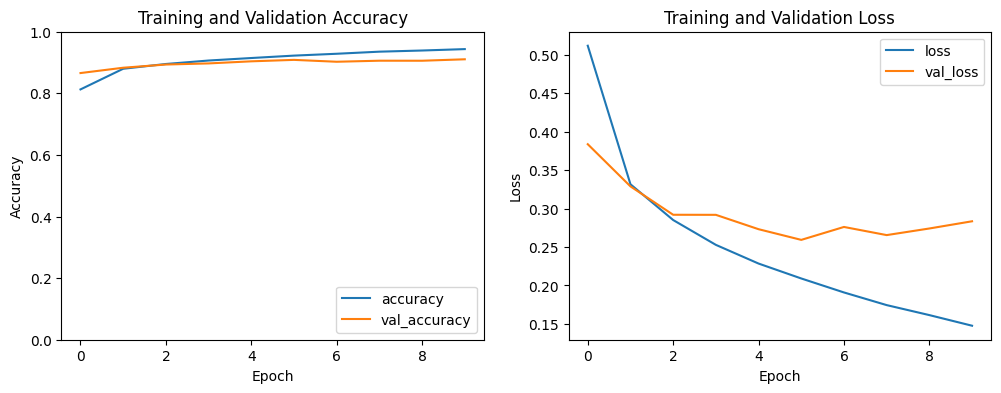

In [28]:
#step-8. Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Making predictions on a few test images...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


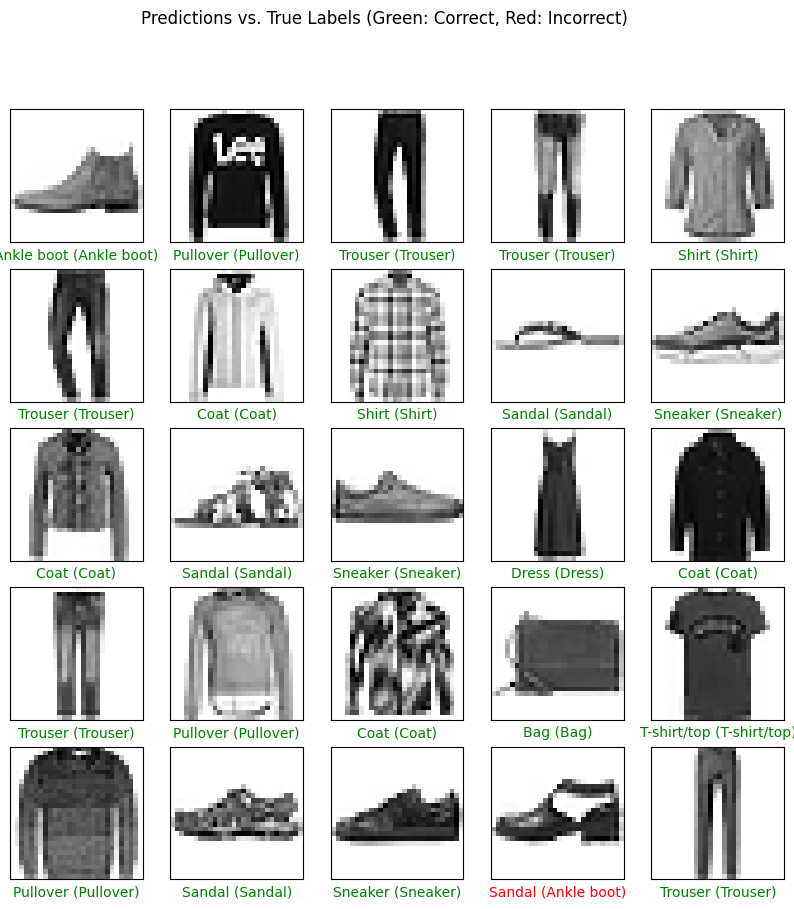

In [29]:
#step-9. Make Predictions (Optional)
print("\nMaking predictions on a few test images...")
predictions = model.predict(test_images)

# Display some predictions
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
plt.suptitle("Predictions vs. True Labels (Green: Correct, Red: Incorrect)")
plt.show()



---

